In [1]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
from scipy import stats as st
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [23]:
# Models from data creating
def best_fit_distribution(data, bins=200, ax=None):
    
    # Plot histogram of original dataset
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    #DISTRIBUTIONS = [        
     #   st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
      #  st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
     #   st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
      #  st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
       # st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        #st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
     #   st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
      #  st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
       # st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        #st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    #]
    DISTRIBUTIONS = [st.gamma, st.norm, st.chi2, st.expon, st.weibull_min]

    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    Distributer = {}

    # Distribution parameters
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
           
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted pdf
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                Distributer[distribution.name] = (loc,scale,
                                                  *arg, st.ks_2samp(data,distribution.rvs(*arg,loc = loc, scale = scale,size = len(data))).pvalue)
                
                

                # axis work
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # proof of perfect distribution
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass
        
        
    

    return (best_distribution.name, best_params, Distributer)

In [24]:
#ua = pd.Series(sm.datasets.stackloss.load_pandas().data.set_index('STACKLOSS').values.ravel())

In [25]:
#ua.plot(kind = 'hist', bins = 50, normed = True, alpha = 0.75)

In [26]:
#dataset inplace. Import from statsmodels library

#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
data = pd.Series(np.random.normal(loc = 200,scale = 2.0, size = (2000)))

/home/evgen/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


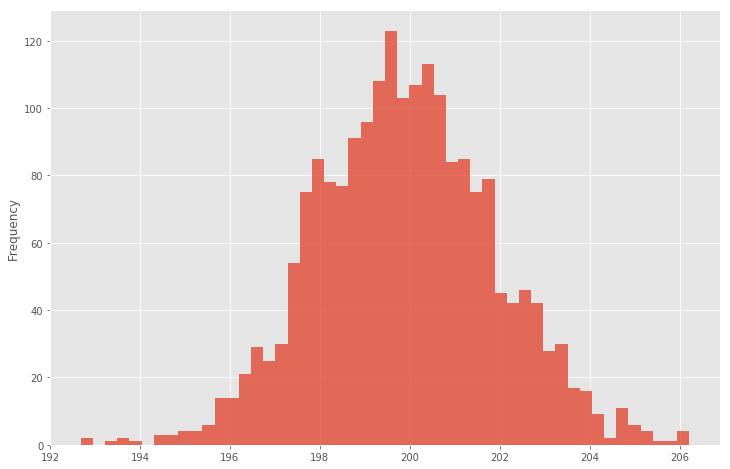

In [27]:
# normed hist - non
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=False, alpha=0.8);

/home/evgen/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


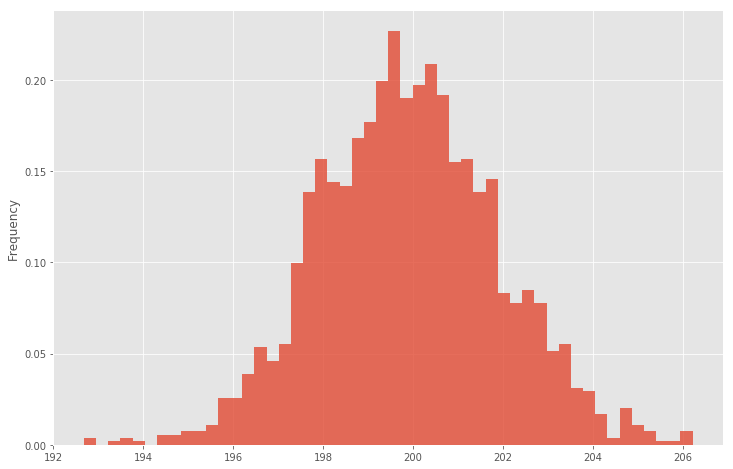

In [28]:
# normed hist - True
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.8);

In [29]:
def make_pdf(dist, params, size=10000):
   

    # Separate param-rs
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build pdf
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


In [42]:
# Find best fit distribution
best_fit_name, best_fir_paramms,kolmogorov_dict = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)
top_ks_dist_name, top_ks_fir_paramms = sorted(kolmogorov_dict.items(), key=lambda x: x[1][-1],reverse=True)[0][0], sorted(kolmogorov_dict.items(), key=lambda x: x[1][-1],reverse=True)[0][1][:-1]
top_dist = getattr(st, top_ks_dist_name)


In [43]:
top_ks_fir_paramms

(199.90431716137059, 1.9810440303333758)

Best fit-distribution name:  gamma
Best paramms of this distribution:  (1283.5697409617019, 128.93216448410442, 0.055292772919303984)


/home/evgen/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


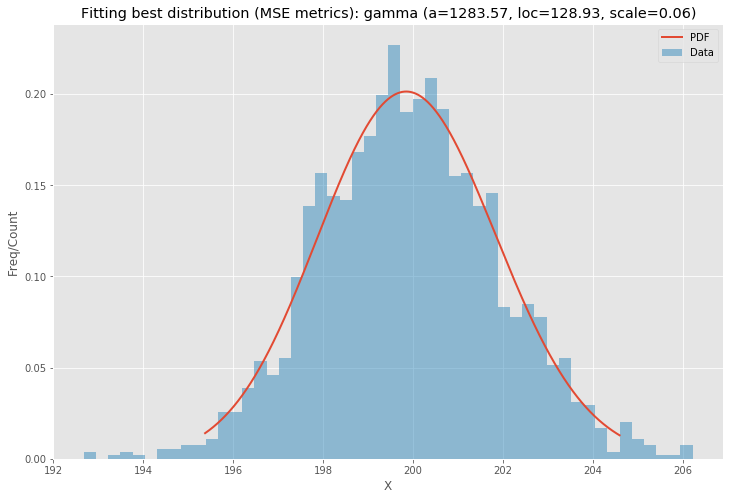

In [48]:
# Make pdf
pdf = make_pdf(best_dist, best_fir_paramms)

print('Best fit-distribution name: ', best_fit_name)
print('Best paramms of this distribution: ', best_fir_paramms)

# Display
plt.figure(figsize=(12,8));
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{} ({})'.format(best_fit_name, param_str)


plt.title('Fitting best distribution (MSE metrics): '+dist_str);
plt.xlabel('X');
plt.ylabel('Freq/Count');




Best fit-distribution name:  norm
Best paramms of this distribution:  (199.90431716137059, 1.9810440303333758)


/home/evgen/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


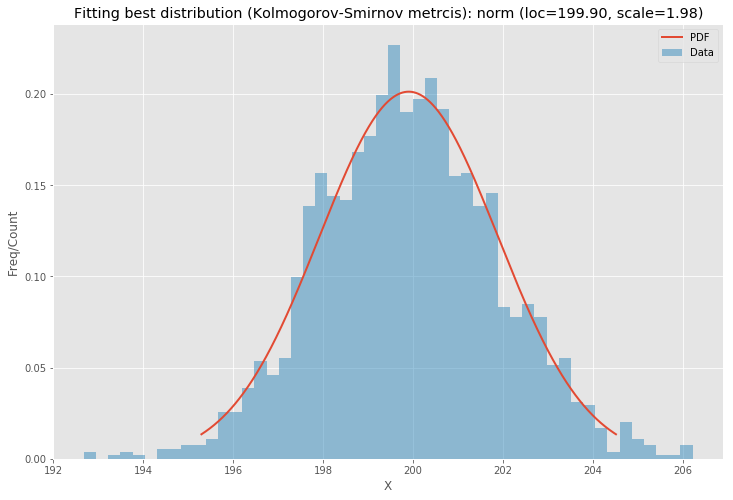

In [44]:
# Make pdf top
pdf_top_ks = make_pdf(top_dist, top_ks_fir_paramms)

print('Best fit-distribution name: ', top_ks_dist_name)
print('Best paramms of this distribution: ', top_ks_fir_paramms)

# Display
plt.figure(figsize=(12,8));
ax = pdf_top_ks.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (top_dist.shapes + ', loc, scale').split(', ') if top_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, top_ks_fir_paramms)])
dist_str = '{} ({})'.format(top_ks_dist_name, param_str)


plt.title('Fitting best distribution (Kolmogorov-Smirnov metrics): '+dist_str);
plt.xlabel('X');
plt.ylabel('Freq/Count');



<function __main__.best_fit_distribution>

In [22]:
y = np.random.exponential(scale = 2.0, size = (2000))

In [31]:
data = pd.Series(y)

/home/evgen/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


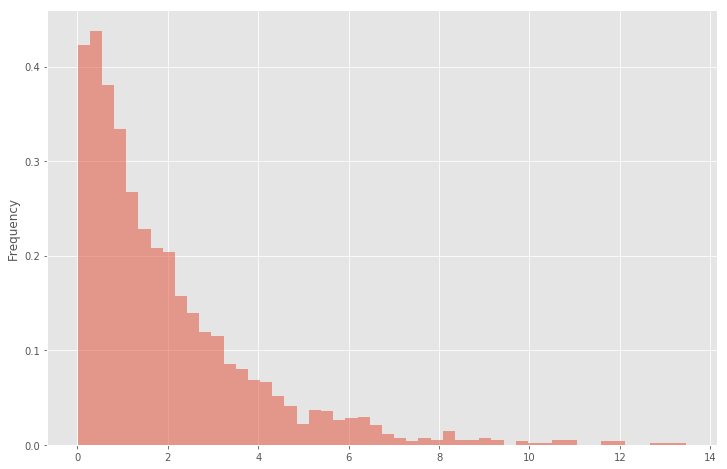

In [33]:
# Display
plt.figure(figsize=(12,8));
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data')

In [72]:
#1 --- оставить 4 распределения (exp, norm,weibull, gammaб chi2)
#2 --- разобраться с параметрами
#3 --- писать название распределения и параметры в текстовый файлик
#4 --- в матлабе считывание из файлика названия и параметров
#5 --- выбор распределения и перекладывание на syms
#6 --- визуализация вбр,потока, интенсивности и всего остального
#7 --- отправить франкенштейна Ветровой

# Критерий Колмагорова-Смирнова

In [43]:
work_data = np.random.normal(loc = 200, scale = 50, size = 2000)


In [46]:
x = st.norm.rvs(loc=200, scale = 50,size=2000)

In [47]:
st.ks_2samp(work_data,x)

Ks_2sampResult(statistic=0.017000000000000015, pvalue=0.9327952309874394)

In [16]:
np.random.gamma(139.8, 0.07,2000)

array([11.0079372 ,  8.67224818, 11.16272468, ..., 11.36117364,
        9.88482385,  9.12250585])

In [110]:
work_pd = pd.Series(work_data)
work_data

array([170.92703494, 274.65514802, 264.72517032, ..., 273.77520613,
       219.83073816, 225.01303439])

In [31]:
st.gamma?

TypeError: unorderable types: str() > int()

In [165]:
bump = []
for i in range(pdf.shape[0]):
    bump.append(pdf.iloc[i])
bump = np.array(bump)


In [58]:
np.random.seed(42)


AttributeError: module 'scipy.stats' has no attribute 'random'

In [57]:
st.ks_2samp(data,st.gamma.rvs(best_fir_paramms[0], best_fir_paramms[1], best_fir_paramms[2], len(data)))

Ks_2sampResult(statistic=0.031500000000000014, pvalue=0.2699921296588113)

In [167]:
getattr(st, best_fit_name)

In [62]:
st.norm.name

'norm'

In [126]:
best_fir_paramms

(200.02301784316214, 1.935740681139715)

In [96]:
best_fit_distribution(data, 200, ax)

('norm', (0.0, 1.0), {})

In [121]:
top_kek = sorted(d.items(), key=lambda x: x[1][-1],reverse=True)[0]
        
    

In [125]:
# Find best fit distribution
#best_fit_name, best_fir_paramms,d = best_fit_distribution(data, 200, ax)
top_dist = getattr(st, top_kek[0])


In [127]:
pdf = make_pdf(top_dist, top_kek[1])
print('Best fit-distribution name: ', top_kek[0])
print('Best paramms of this distribution: ', top_kek[1])

# Display
plt.figure(figsize=(12,8));
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (top_dist.shapes + ', loc, scale').split(', ') if top_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, top_kek[1])])
dist_str = '{} ({})'.format(top_kek[0], param_str)


plt.title('Fitting best distribution: '+dist_str);
plt.xlabel('X');
plt.ylabel('Freq/Count');




TypeError: _parse_args() got multiple values for argument 'loc'

Best fit-distribution name:  gamma
Best paramms of this distribution:  (1283.5697409617019, 128.93216448410442, 0.055292772919303984)


/home/evgen/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Best fit-distribution name:  norm
Best paramms of this distribution:  (199.90431716137059, 1.9810440303333758)


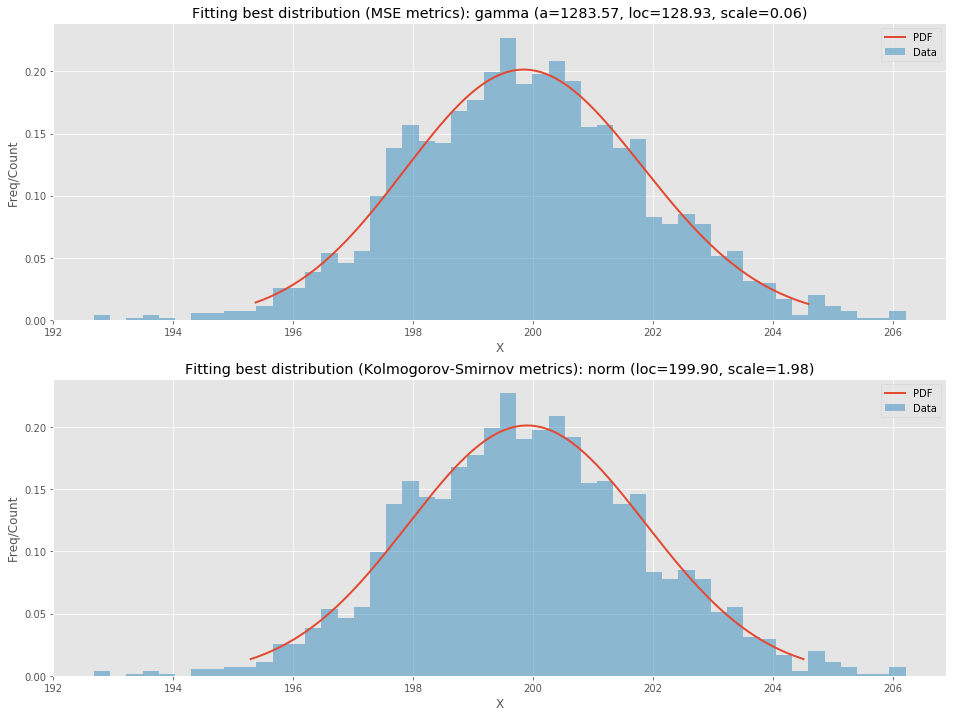

In [54]:
# Make pdf
pdf = make_pdf(best_dist, best_fir_paramms)

print('Best fit-distribution name: ', best_fit_name)
print('Best paramms of this distribution: ', best_fir_paramms)


plt.figure(figsize = (16,12))
# Display
plt.subplot(2,1,1)
#plt.figure(figsize=(12,8));
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{} ({})'.format(best_fit_name, param_str)


plt.title('Fitting best distribution (MSE metrics): '+dist_str);
plt.xlabel('X');
plt.ylabel('Freq/Count');


plt.subplot(2,1,2)
# Make pdf top
pdf_top_ks = make_pdf(top_dist, top_ks_fir_paramms)

print('Best fit-distribution name: ', top_ks_dist_name)
print('Best paramms of this distribution: ', top_ks_fir_paramms)

# Display
#plt.figure(figsize=(12,8));
ax = pdf_top_ks.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (top_dist.shapes + ', loc, scale').split(', ') if top_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, top_ks_fir_paramms)])
dist_str = '{} ({})'.format(top_ks_dist_name, param_str)


plt.title('Fitting best distribution (Kolmogorov-Smirnov metrics): '+dist_str);
plt.xlabel('X');
plt.ylabel('Freq/Count');



plt.savefig('combo_criterion.pdf')

In [55]:
import json

# as requested in comment
exDict = {'exDict': kolmogorov_dict}

with open('file_ks.txt', 'w') as file:
     file.write(json.dumps(exDict))